In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# csv 파일을 로드 후 0행의 컬럼명을 인덱스로 수정 및 0행 삭제
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trip.csv', header=None)
df.columns = ['passenger_name',	'tpep_pickup_datetime',	'tpep_dropoff_datetime',	'payment_method',	'passenger_count',	'trip_distance',	'fare_amount',	'tip_amount',	'tolls_amount']
df = df.drop(0, axis="index")
df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13,2.76,0
2,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.8,16,4,0
3,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1,6.5,1.45,0
4,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.7,20.5,6.39,0
5,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0,0
...,...,...,...,...,...,...,...,...,...
22697,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4,0,0
22698,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52,14.64,5.76
22699,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0,0
22700,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.7,0


In [106]:
# 1.텍스트 및 날짜 데이터를 자유롭게 변환하고 필요한 정보를 추출할 수 있는가?
 # 1-1. 승, 하차시간의 데이터 타입을 datetime으로 변경해보기

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime']) # 승차 시간 datetime으로 변경하기
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime']) # 하차 시간 datetime으로 변경하기
df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Debit Card,6,3.34,13,2.76,0
2,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Debit Card,1,1.8,16,4,0
3,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Debit Card,1,1,6.5,1.45,0
4,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.7,20.5,6.39,0
5,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Debit Card,1,4.37,16.5,0,0
...,...,...,...,...,...,...,...,...,...
22697,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4,0,0
22698,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52,14.64,5.76
22699,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Debit Card,1,0.42,4.5,0,0
22700,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Debit Card,1,2.36,10.5,1.7,0


In [107]:
  # 1-2. 주행 시간을 표준 편차로 구해보기

df['trip_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['trip_time']
# [주행시간 = 하차시간 - 승차시간] / trip_time이라는 새로운 컬럼을 생성해 값을 추가하기

df['trip_time'].describe()
# 주행 시간에 대한 통계적 정보 확인하기

df['trip_time'].std()
# 주행 시간 표준 편차

Timedelta('0 days 01:01:59.629029790')

<Axes: xlabel='payment_method', ylabel='count'>

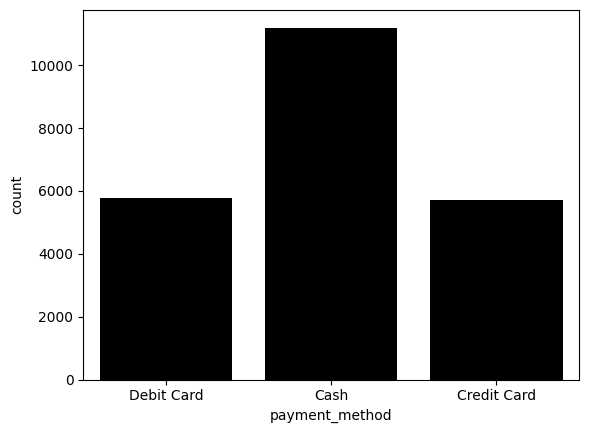

In [109]:
  # 1-3. 결제 방식(payment_method)은 어떤 방법이 가장 많았는지 확인하기

df['payment_method'].value_counts()
# 결제 방식은 'Cash', 'Debit Card', 'Credit Card' 3가지로 나타났다.

df['payment_method'].describe()
# 22,701번의 결제 중 가장 많은 결제 방식은 'Cash'였고, 11,196번이나 'Cash'로 지불했다.

sns.countplot(data=df, x='payment_method', color='black')

In [70]:
  # 1-4. Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보기

df['new_payment_method'] = df['payment_method'].copy()
df['new_payment_method'] = df['payment_method'].replace(['Credit Card', 'Debit Card'], 'Card')
# 기존 결제 방식 컬럼을 new로 새로 생성 후 Credit, Debit Card를 그냥 Card로 변경

df

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,new_payment_method
1,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13,2.76,0,Card
2,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16,4,0,Card
3,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0,Card
4,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0,Cash
5,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0,0,Card
...,...,...,...,...,...,...,...,...,...,...
22697,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4,0,0,Cash
22698,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52,14.64,5.76,Cash
22699,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0,0,Card
22700,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.7,0,Card


In [123]:
# 2. 결측치 및 이상치를 판별할 수 있고, 해당 데이터를 처리할 수 있는가?
  # 2-1. 결측치 확인하기

df.isna().mean()
# 요금 금액(fare_amount)에서 결측치가 0.000132%로 확인됨

df['fare_amount'] = df['fare_amount'].fillna(0)
df = df[df['fare_amount'] > 0]
# 0.000132%의 아주 근소한 데이터로 결측치를 0으로 수정 후 데이터 제거하기

df.isna().mean()
# 다시 한번 결측치 확인하기

,0
passenger_name,0.0
tpep_pickup_datetime,0.0
tpep_dropoff_datetime,0.0
payment_method,0.0
passenger_count,0.0
trip_distance,0.0
fare_amount,0.0
tip_amount,0.0
tolls_amount,0.0
trip_time,0.0


<Axes: xlabel='None', ylabel='trip_distance'>

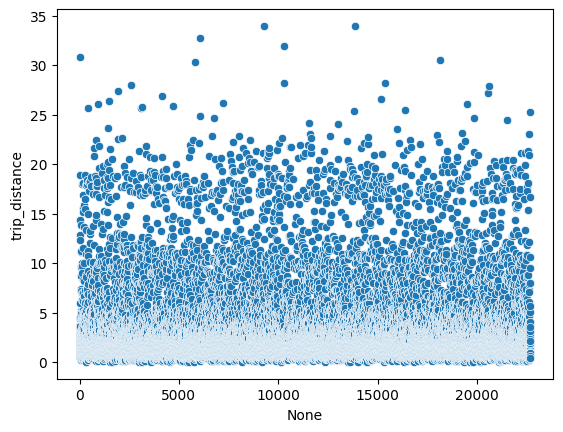

In [76]:
  # 2-2. 이상치 확인하기

df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')
df['trip_distance'].describe()
# 주행 거리의 이상치 확인하기

df = df[(df['trip_distance'] > 0)]
df['trip_distance'].describe()
# 주행 거리의 min의 0 이상치 제거하기 -> 0km는 주행 거리 기록의 오류일 수 있음

sns.scatterplot(x=df.index, y=df['trip_distance'])
# 주행 거리에 대한 scatter plot

In [120]:
# 3. 데이터의 특성을 확인하고, 해당 정보를 해석할 수 있는가?
  # * 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계 알아보기
  # 이동 거리가 길고 시간이 오래 걸릴수록 요금이 비례적으로 증가할 것

df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')
df['tip_amount'] = pd.to_numeric(df['tip_amount'], errors='coerce')
df['tolls_amount'] = pd.to_numeric(df['tolls_amount'], errors='coerce')

df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]

df['total_paid'] = df['fare_amount'] + df['tip_amount'] + df['tolls_amount']
df['paid_per_km'] = df['total_paid'] / df['trip_distance']

df[['trip_distance', 'trip_time', 'fare_amount']].corr()
corr_distance = df['trip_distance'].corr(df['fare_amount'])
corr_time = df['trip_time'].corr(df['fare_amount'])

print(f"주행 거리와 요금 간 상관계수: {corr_distance:.3f}")
print(f"주행 시간과 요금 간 상관계수: {corr_time:.3f}")

# 거리는 길수록 요금이 확실히 증가하지만, 시간은 요금에 거의 영향을 받지 않았다.

주행 거리와 요금 간 상관계수: 0.800
주행 시간과 요금 간 상관계수: 0.148
